# 선형회귀 모델 작성, 예측, 평가

#LinearRegressor & RandomForestRegressor()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data1/premium.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 중복 데이터 확인 및 제거
display(df[df.duplicated(keep=False)])
df = df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [5]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5148\1321925332.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
col_lst = ['sex', 'smoker', 'region']
for col in col_lst:
	encoder = LabelEncoder()
	df[col] = encoder.fit_transform(df[col])

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


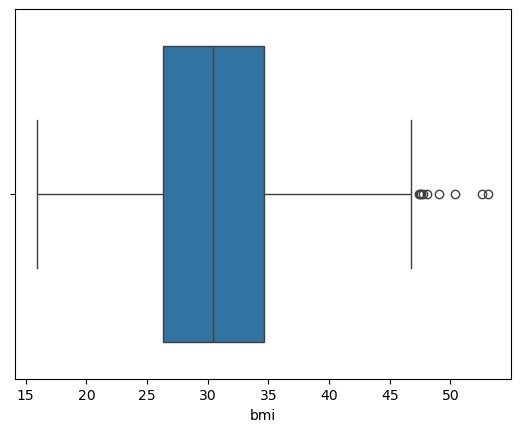

In [7]:
sns.boxplot(data=df, x='bmi')
plt.show()

In [8]:
df.loc[df['bmi'] > 47]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [10]:
from sklearn.model_selection import train_test_split
X = df_scaled[:, :-1]
y = df_scaled[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse

(np.float64(0.07035311342598079), np.float64(0.010675822560356952))

In [24]:
rmse = np.sqrt(mse)
rmse

np.float64(0.10332387217074741)

In [25]:
r2_score(y_test, y_pred)

np.float64(0.7509301700456745)

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
# 예측하기
r_pred = model.predict(X_test)
# 필요한 모듈을 import 하고 성능평가지표 적용하기
from sklearn.metrics import mean_squared_error, mean_absolute_error

mae = mean_absolute_error(y_test, r_pred)
mse = mean_squared_error(y_test, r_pred)


# 성능평가값 출력하기
print(f'RandomForestRegressor 모델 -  MAE : {round(mae, 4)} /  MSE : {round(mse, 4)}')

RandomForestRegressor 모델 -  MAE : 0.0468 /  MSE : 0.007


In [28]:
r2_score(y_test, r_pred)

np.float64(0.8357634774705669)

In [ ]:
# CV

In [ ]:
# 다항회귀